<a href="https://colab.research.google.com/github/manishmawatwal/Image-Classification-and-Processing/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apples.jpg to apples.jpg


In [ ]:
import numpy as np
from numpy import random
from numpy import *
import pandas as pd
import cv2
import math
import matplotlib.pyplot as plt
from skimage.util import random_noise
import math

In [ ]:
def addNoise(image, magnitude):
    temp = []
    for x in np.nditer(image):
        random = np.random.rand()
        if magnitude > random:
            x = np.random.random_integers(255)  #because randint and rand_range didn't work
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 255 + 1) instead
  


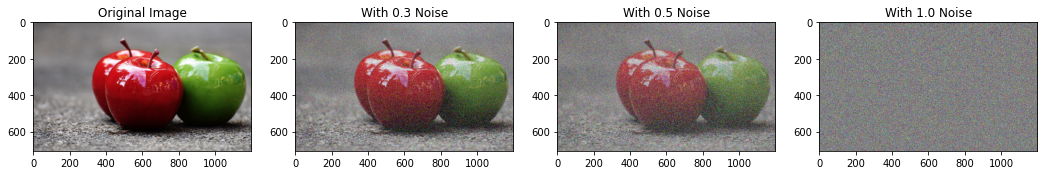

In [ ]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(142)
i=addNoise(img,0.3)
plt.title('With 0.3 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(143)
i=addNoise(img,0.5)
plt.title('With 0.5 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(144)
i=addNoise(img,1)
plt.title('With 1.0 Noise')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def Brighten(image, magnitude):
    temp = []
    for x in np.nditer(image):
        x = x*magnitude
        if x > 255:
            x = 255
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

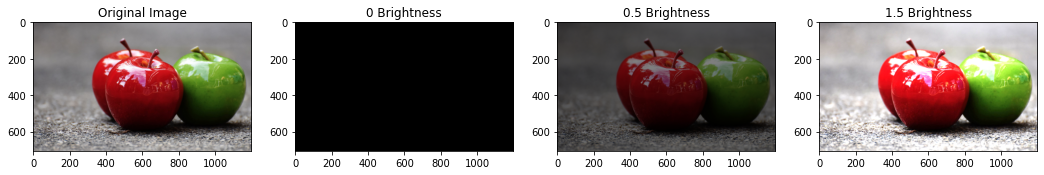

In [ ]:
img = cv2.imread('apples.jpg')
fig, axs = plt.subplots(1, 4, figsize=(18, 15))
plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(142)
i = Brighten(img,0)
plt.title('0 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(143)
i=Brighten(img,0.5)
plt.title('0.5 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

plt.subplot(144)
i=Brighten(img,1.5)
plt.title('1.5 Brightness')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def ChangeContrast(image, magnitude):
    temp = []
    magnitude = magnitude*255 - 255
    f = (259*(255+magnitude)) / (255*(259 - magnitude))
    for x in np.nditer(image):
        x = f*(x - 128)+128
        temp.append(x)
    temp = np.array(temp, dtype = np.uint8).reshape(image.shape[0], image.shape[1], image.shape[2])
    return temp

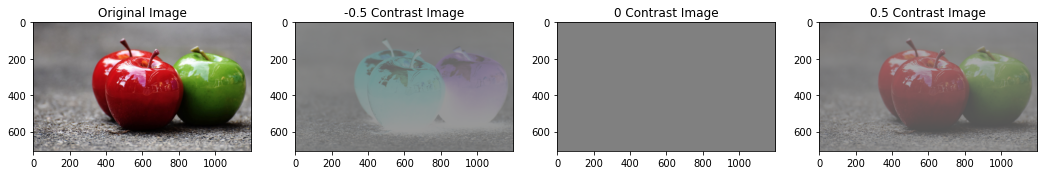

In [ ]:
img = cv2.imread('apples.jpg')
fig,axs = plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i = ChangeContrast(img,-0.5)
plt.subplot(142)
plt.title('-0.5 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=ChangeContrast(img,0)
plt.subplot(143)
plt.title('0 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=ChangeContrast(img,0.5)
plt.subplot(144)
plt.title('0.5 Contrast Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def get_gaussian_filter(sigma):
    filter_width = int(math.ceil(3*sigma)*2 + 1)
    x = filter_width // 2
    gaussian_filter = np.zeros((filter_width, filter_width))
    for i in range(-x, x+1):
        for j in range(-x, x+1):
            numerator = math.exp(-1*(i**2 + j**2)/(2*(sigma**2)))
            denominator = 2*math.pi*(sigma**2)
            gaussian_filter[i][j] = numerator / denominator
    return gaussian_filter

In [ ]:
def Blur(image,magnitude):
  '''This function blurs the images'''
  sigma=magnitude
  gaussian_filter=get_gaussian_filter(sigma)
  blurred_image= np.zeros((image.shape[0]-gaussian_filter.shape[0], image.shape[1]-gaussian_filter.shape[0],image.shape[2]))
  for x in range(image.shape[0]-gaussian_filter.shape[0]):
    for y in range(image.shape[1]-gaussian_filter.shape[1]):
      for z in range(image.shape[2]):
        blurred_image[x,y,z]=(gaussian_filter * image[x: x+gaussian_filter.shape[0], y: y+gaussian_filter.shape[1],z]).sum()
  blurred_image=np.array(blurred_image,dtype=np.uint8)
  return blurred_image

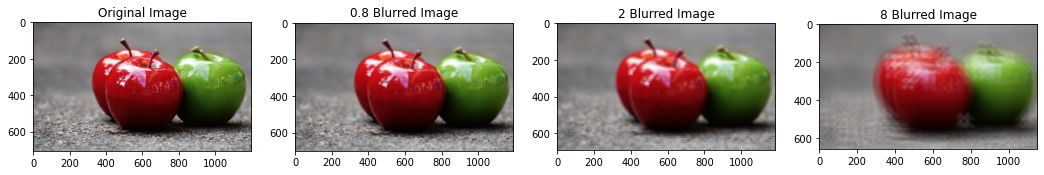

In [ ]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,4,figsize=(18,15))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i=Blur(img,0.8)
plt.subplot(142)
plt.title('0.8 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Blur(img,2)
plt.subplot(143)
plt.title('2 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Blur(img,8)
plt.subplot(144)
plt.title('8 Blurred Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def Sharpen(image):
  #sigma=magnitude
  sharpen_filter=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2,image.shape[2]))
  image_padded[1:-1, 1:-1,:] = image
  sharpened_image= np.zeros((image.shape[0], image.shape[1],image.shape[2]))
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      for z in range(image.shape[2]):
        sharpened_image[x,y,z]=(sharpen_filter * image_padded[x: x+3, y:y+3,z]).sum()
  sharpened_image=np.array(sharpened_image,dtype=np.uint8)
  return sharpened_image

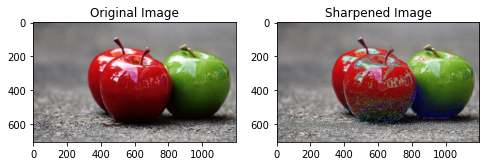

In [ ]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,2,figsize=(8,6))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


i=Sharpen(img)
plt.subplot(122)
plt.title('Sharpened Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def EdgeDetect(image):
  sharpen_filter=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) 
  image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2,image.shape[2]))
  image_padded[1:-1, 1:-1,:] = image
  sharpened_image= np.zeros((image.shape[0], image.shape[1],image.shape[2]))
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      for z in range(image.shape[2]):
        sharpened_image[x,y,z]=abs((sharpen_filter * image_padded[x: x+3, y:y+3,z]).sum())
  sharpened_image=np.array(sharpened_image,dtype=np.uint8)
  return sharpened_image

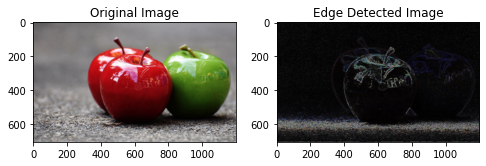

In [ ]:
img=cv2.imread('apples.jpg')

fig,axs=plt.subplots(1,2,figsize=(8,6))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

i=EdgeDetect(img)
plt.subplot(122)
plt.title('Edge Detected Image')
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def Upscaling(image,scale):
  image_upscaled = np.zeros((image.shape[0] * scale, image.shape[1] * scale,image.shape[2]))
  i,j=0,0
  for x in range(image.shape[0]):
    j=0
    for y in range(image.shape[1]):
      for s in range(scale):
        image_upscaled[i+s,j+s,:]=image[x,y,:]
      j+=scale
    i+=scale
  image_upscaled=np.array(image_upscaled,dtype=np.uint8)
  return image_upscaled

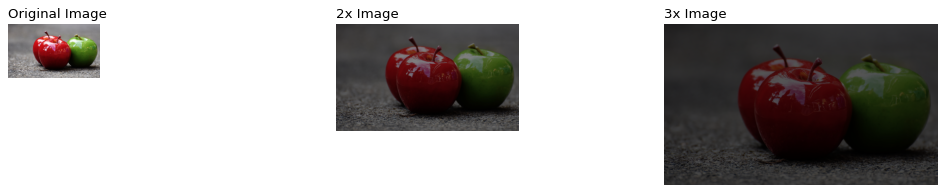

In [ ]:
img=cv2.imread('apples.jpg')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), dpi=80, sharex=True, sharey=True)
fig.patch.set_visible(False)

ax[0].axis('off')
ax[0].set_title('Original Image',loc='left')
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


i=Upscaling(img,2)
ax[1].axis('off')
ax[1].set_title('2x Image',loc='left')
ax[1].imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

i=Upscaling(img,3)
ax[2].axis('off')
ax[2].set_title('3x Image',loc='left')
ax[2].imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [ ]:
def Downsample(image,scale):
  image_downscaled = np.zeros((int(image.shape[0] * scale),int( image.shape[1] * scale),image.shape[2]))
  downscale_factor=int(1/scale)
  for x in range(image_downscaled.shape[0]):
    for y in range(image_downscaled.shape[1]):
      image_downscaled[x,y,:]=image[x*downscale_factor,y*downscale_factor,:]
  image_downscaled=np.array(image_downscaled,dtype=np.uint8)
  return image_downscaled

Original Image


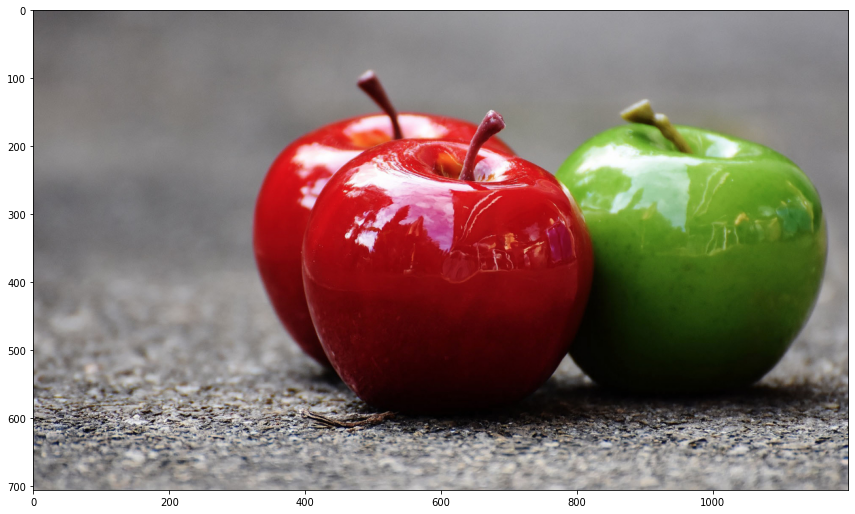

Downscale Image 2x


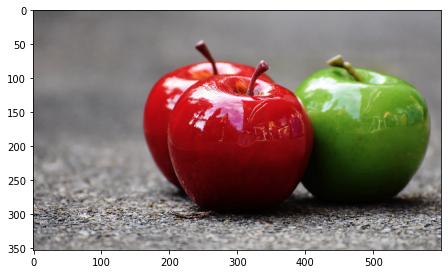

Downscale Image 3x


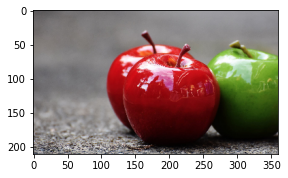

Downscale Image 5x


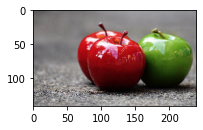

In [ ]:
img=cv2.imread('apples.jpg')

figsize = img.shape[1]/80, img.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print('Original Image')
plt.show()

i=Downsample(img,0.5)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 2x')
plt.show()

i=Downsample(img,0.3)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 3x')
plt.show()

i=Downsample(img,0.2)
figsize = i.shape[1]/80, i.shape[0]/80
fig = plt.figure(figsize=figsize)
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
print('Downscale Image 5x')

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving giraffe.png to giraffe.png


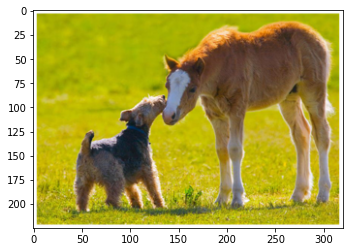

In [ ]:
image = Image.open('giraffe.png')
image = image.resize((320,225))
image = np.array(image)
plt.imshow(image)

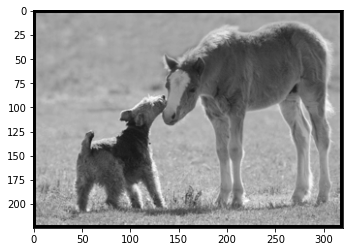

In [ ]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap = 'gray')

Region based Segmentation of the image (2 Folds)

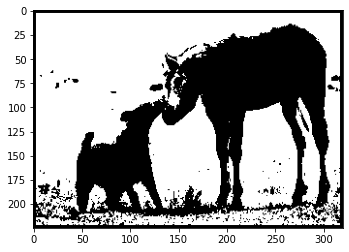

In [ ]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr = gray.flatten()
for i in range(len(arr)):
    if arr[i] >= arr.mean() :
        arr[i] = 1
    else:
        arr[i] = 0
gray_segmented = arr.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray_segmented,cmap='gray')

Region based Segmentaion of the image (5 Folds)

In [ ]:
# What if we tune the above function more??
arr = gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i] = 2
    elif arr[i]>0.25:
        arr[i] = 1
    else:
        arr[i] = 0
gray_segmented_2 = arr.reshape(gray.shape[0],gray.shape[1])

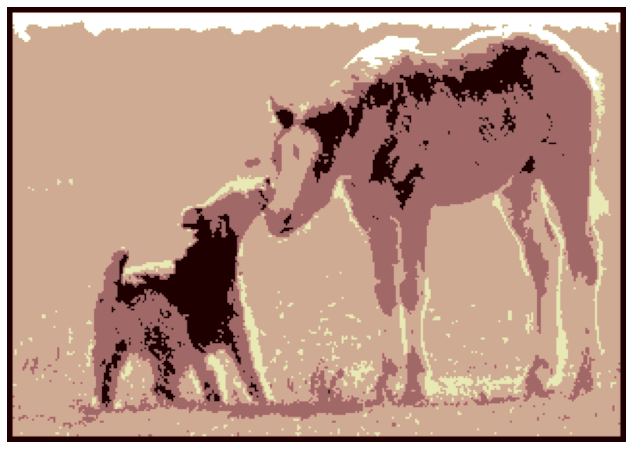

In [ ]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

We therefore try a region-based method using the watershed transform. First, we find an elevation map using the Sobel gradient of the image.

The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.

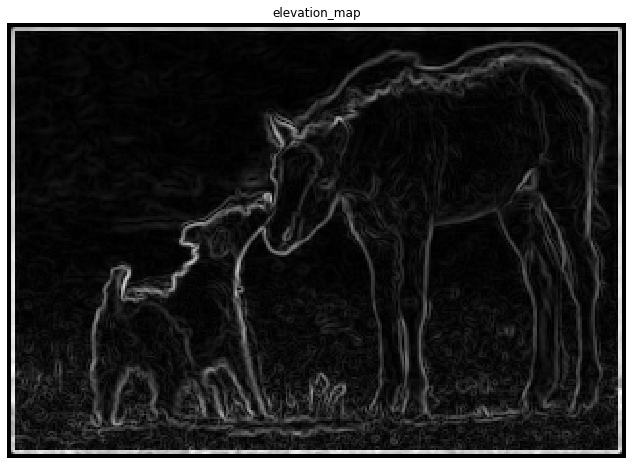

In [ ]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

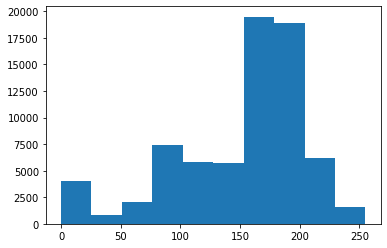

In [ ]:
#Getting the extreme parts of the image using histogram
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

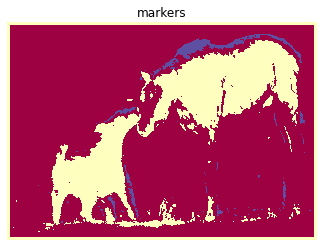

In [ ]:
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

Text(0.5, 1.0, 'segmentation')

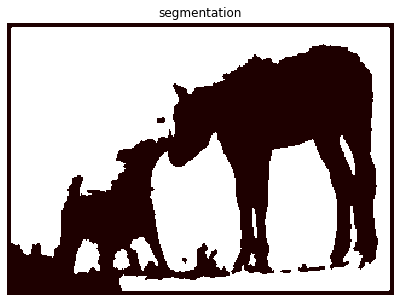

In [ ]:
from skimage import filters
import skimage.segmentation
segmentation = skimage.segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(segmentation, cmap='pink',interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

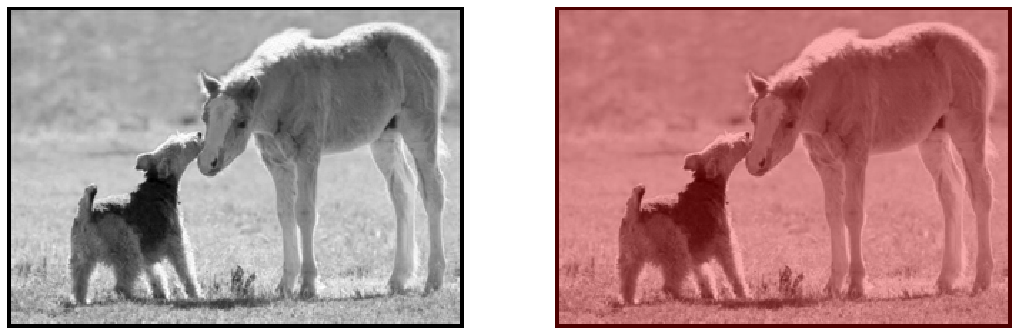

In [ ]:
#segmentation and labelling together
import scipy.ndimage
from skimage.color import label2rgb

segmentation = ndimage.binary_fill_holes(segmentation - 1)
labeled_mountains, _ = ndimage.label(segmentation)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths = 1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation = 'nearest')
ax2.axis('off')
ax2.set_adjustable('box')

Edge Detection of an image : Segmentation using Edges

Makes use of discontinuous local features of an image to detect edges and hence define a boundary of the object.

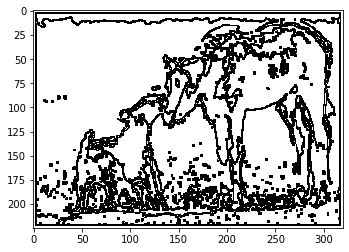

In [ ]:
# we are gonna use kernel laplace here to discover the edges in the image :)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_l = ndimage.convolve(gray_segmented_2, kernel_laplace, mode='reflect')
arr = []
for i in out_l.flatten():
    if i == 0:
        arr.append(0)
    else:
        arr.append(-100)
arr = np.array(arr)
arr = arr.reshape(out_l.shape[0], out_l.shape[1])
plt.imshow(arr, cmap='gray', interpolation='nearest')

Segmentation Using Clustering

In [ ]:
im = image/255
pic = im.reshape(im.shape[0]*im.shape[1],im.shape[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


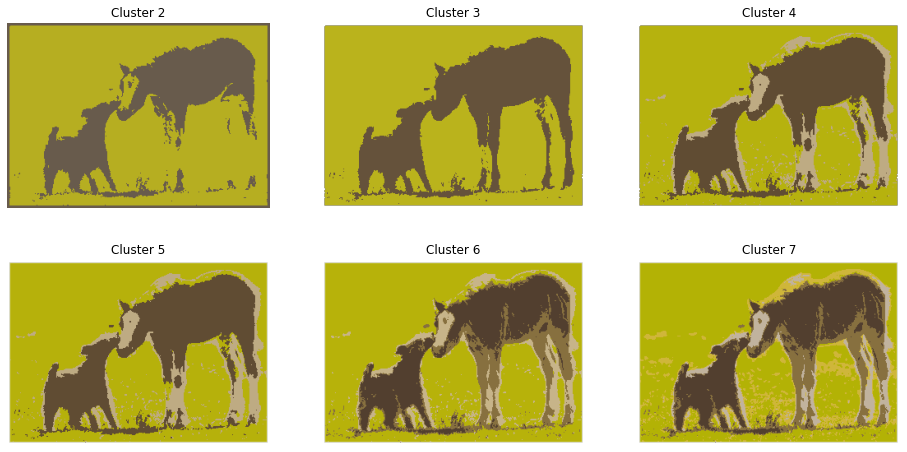

In [ ]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count = 1
for i in range(2):
    for j in range(3):
        kmeans = KMeans(n_clusters = count+1, random_state = 0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic = pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count += 1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()